# Aeff toy MC


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:

plt.rcParams['text.usetex'] = False

define the function for the selection efficiency, as a function of log10(E): 


In [3]:
def Eeff(logE):
    x0=2.7
    y=1-1./(np.exp((logE-x0)/0.5)+1)  
    
    return y

<img src="plotEff.png" alt="efficiency" width="300px">



generatig random distributions using numpy arrays:

In [4]:
Nev=10000000 # n. of events we simulate
E_MIN=100
E_MAX=10000000

# generate energies with E^-1 spectrum, using the inversion method 
u1=np.random.rand(Nev)
energies=E_MIN*np.exp(u1*np.log(E_MAX/E_MIN))

#generate phi angles (even if this is not used at the moment)
u2=np.random.rand(Nev)
phi = 2*np.pi*u2

#generate theta angles 
u3=np.random.rand(Nev)
theta= np.arccos(u3)

#generate x,y impact points with -1<x<1, -1<y<1  (2x2 m^2) 
x= -1+2*np.random.rand(Nev)
y=-1+2*np.random.rand(Nev)
     
 

In [5]:
#theta1=[40/180 *np.pi for i in range(0,int(0.6*Nev))]

In [6]:
#theta2=[60/180 *np.pi for i in range(0,int(0.4*Nev))]

In [7]:
#theta=np.concatenate((theta1,theta2))

apply cuts using array masks:

In [8]:
#energy mask using the hit/miss method. 
u5=np.random.rand(Nev)
pe=Eeff(np.log10(energies))
e_mask=u5<pe # keep the cases where u < y 

#combine all cuts:
totalMask=(e_mask& (x>-np.sqrt(2)/2)& (x<np.sqrt(2)/2)  & (y>-np.sqrt(2)/2)& (y<np.sqrt(2)/2))# detector dimensions -0.5-0.5  on both axis

plot the distributions:
Energy: (note that the resulting histo include all cuts, not only on energy)    

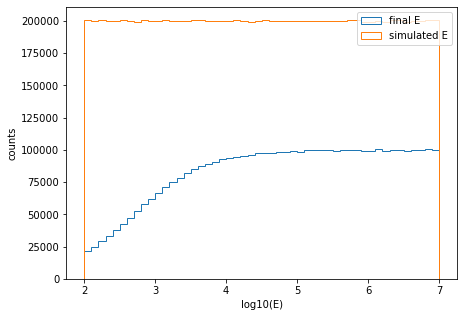

In [9]:
plt.figure(1,figsize=(7,5))
plt.hist(np.log10(energies[totalMask]), bins=50, alpha=1, histtype='step', label='final E')
plt.hist(np.log10(energies), bins=50, alpha=1,  histtype='step',label='simulated E')
plt.legend()
plt.xlabel('log10(E)')
plt.ylabel('counts')
plt.savefig("counts(E).png")
plt.show()


theta and phi:

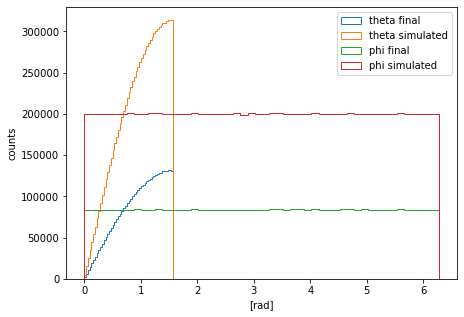

In [10]:
plt.figure(2,figsize=(7,5))
plt.hist(theta[totalMask], bins=50, alpha=1, histtype='step', label='theta final')
plt.hist(theta, bins=50, alpha=1, histtype='step', label='theta simulated')
#plt.figure(3)
plt.hist(phi[totalMask], bins=50, alpha=1, histtype='step', label='phi final')
plt.hist(phi, bins=50, alpha=1, histtype='step', label='phi simulated')
plt.xlabel('[rad]')
plt.ylabel('counts')
plt.legend()
plt.savefig("counts(angle).png")
plt.show()


x,y

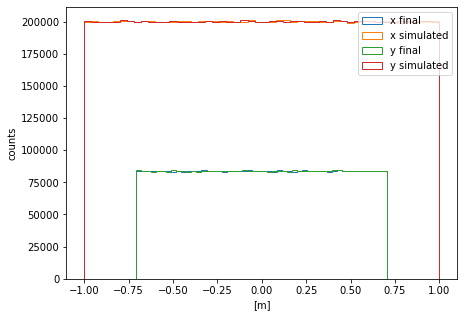

In [11]:
plt.figure(3,figsize=(7,5))
plt.hist(x[totalMask], bins=50, alpha=1, histtype='step', label='x final')
plt.hist(x, bins=50, alpha=1, histtype='step', label='x simulated')
#plt.figure(3)
plt.hist(y[totalMask], bins=50, alpha=1, histtype='step', label='y final')
plt.hist(y, bins=50, alpha=1, histtype='step', label='y simulated')
plt.xlabel('[m]')
plt.ylabel('counts')
plt.legend()
plt.savefig("counts(area).png")
plt.show()


create rensponse matrix:

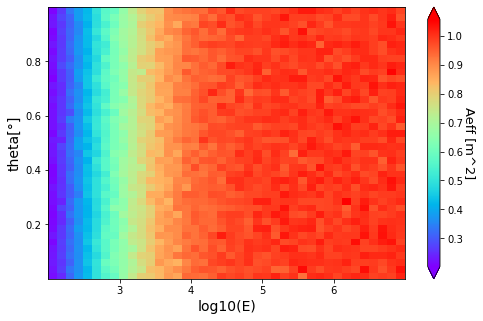

In [12]:
nBins2d=40
H,xbins,ybins=np.histogram2d(np.log10(energies[totalMask]),np.cos(theta[totalMask]),nBins2d)

# histogram normaliztion
normFactor=Nev/(2*nBins2d**2) # the factor 4 comes form the area reatio
H=H/(normFactor)
# plot
#y=[i/np.pi*180 for i in ybins]
fig, ax1 = plt.subplots(figsize=(8, 5))
p=ax1.pcolormesh(xbins,ybins,H.T, cmap='rainbow')
bar=fig.colorbar(p, ax=ax1, extend='both')
bar.ax.set_ylabel('Aeff [m^2]', rotation=270,labelpad=13,fontsize=13)
ax1.set_xlabel('log10(E)',fontsize=14)
ax1.set_ylabel('theta[°]',fontsize=14)
plt.savefig("Aeff_costheta.png")
plt.show()

In [13]:
y

array([ 0.61317205,  0.96089551,  0.31392147, ...,  0.88149527,
       -0.07493608,  0.01189948])

In [14]:
ybins

array([1.26776920e-07, 2.50001234e-02, 5.00001200e-02, 7.50001166e-02,
       1.00000113e-01, 1.25000110e-01, 1.50000106e-01, 1.75000103e-01,
       2.00000100e-01, 2.25000096e-01, 2.50000093e-01, 2.75000089e-01,
       3.00000086e-01, 3.25000083e-01, 3.50000079e-01, 3.75000076e-01,
       4.00000072e-01, 4.25000069e-01, 4.50000066e-01, 4.75000062e-01,
       5.00000059e-01, 5.25000055e-01, 5.50000052e-01, 5.75000049e-01,
       6.00000045e-01, 6.25000042e-01, 6.50000038e-01, 6.75000035e-01,
       7.00000032e-01, 7.25000028e-01, 7.50000025e-01, 7.75000021e-01,
       8.00000018e-01, 8.25000015e-01, 8.50000011e-01, 8.75000008e-01,
       9.00000004e-01, 9.25000001e-01, 9.49999998e-01, 9.74999994e-01,
       9.99999991e-01])

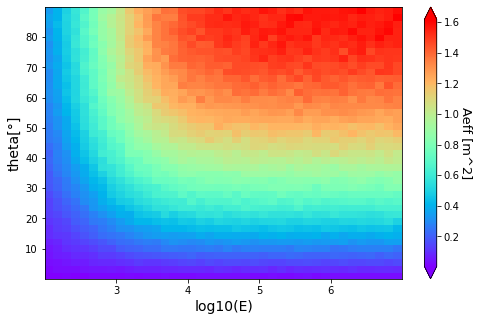

In [26]:
nBins2d=40
H,xbins,ybins=np.histogram2d(np.log10(energies[totalMask]),theta[totalMask],nBins2d)

# histogram normaliztion
normFactor=Nev/(2*nBins2d**2) # the factor 4 comes form the area reatio
H=H/(normFactor)
# plot
y=[i/np.pi*180 for i in ybins]
fig, ax1 = plt.subplots(figsize=(8, 5))
p=ax1.pcolormesh(xbins,y,H.T, cmap='rainbow')
bar=fig.colorbar(p, ax=ax1, extend='both')
bar.ax.set_ylabel('Aeff [m^2]', rotation=270,labelpad=13,fontsize=13)
ax1.set_xlabel('log10(E)',fontsize=14)
ax1.set_ylabel('theta[°]',fontsize=14)
#ax1.set_xscale("log")
plt.savefig("Aeff_theta.png")
plt.show()


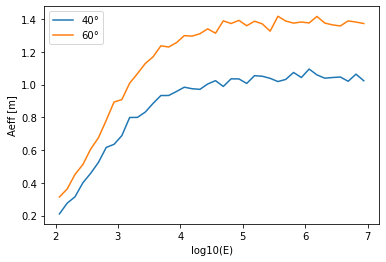

In [28]:
# Finallly slect one bin in cos(theta) and plot Aeff vs log10(E) for that bin

plt.figure(5)
halfxbin=(xbins[1]-xbins[0])/2.
plt.plot(xbins[:-1]+halfxbin, H.T[18],label="40°" )
plt.plot(xbins[:-1]+halfxbin, H.T[27],label="60°" )
plt.legend()
plt.xlabel('log10(E)')
plt.ylabel('Aeff [m]')
plt.savefig("40_60")
plt.show()


In [17]:
mean=[0.6*H.T[18][i]+0.4*H.T[27][i] for i in range(0,len(H.T[18]))]

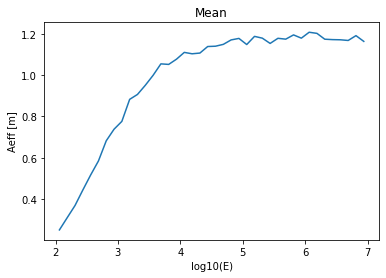

In [18]:
# Finallly slect one bin in cos(theta) and plot Aeff vs log10(E) for that bin

plt.figure(5)
halfxbin=(xbins[1]-xbins[0])/2.
plt.plot(xbins[:-1]+halfxbin, mean )
plt.title("Mean" )
plt.xlabel('log10(E)')
plt.ylabel('Aeff [m]')
plt.savefig("Mean")
plt.show()


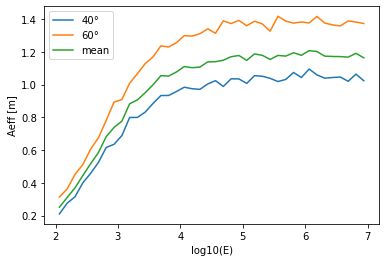

In [29]:
# Finallly slect one bin in cos(theta) and plot Aeff vs log10(E) for that bin

plt.figure(5)
halfxbin=(xbins[1]-xbins[0])/2.
plt.plot(xbins[:-1]+halfxbin, H.T[18],label="40°" )
plt.plot(xbins[:-1]+halfxbin, H.T[27],label="60°" )
plt.plot(xbins[:-1]+halfxbin,mean,label="mean" )
plt.legend()
plt.xlabel('log10(E)')
plt.ylabel('Aeff [m]')
plt.savefig("Aeff_all")
plt.show()
